# YFinance Tutorial 
Source: 
https://aroussi.com/post/python-yahoo-finance https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
msft = yf.Ticker("MSFT")
start_date = "2017-01-01"
end_date = "2021-03-20"
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [8]:
msft.history(period="max").tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-08,231.369995,233.369995,227.130005,227.389999,35245900,0.0,0.0
2021-03-09,232.880005,235.380005,231.669998,233.779999,33034000,0.0,0.0
2021-03-10,237.000000,237.000000,232.039993,232.419998,29733000,0.0,0.0
2021-03-11,234.960007,239.169998,234.309998,237.130005,29896000,0.0,0.0
2021-03-12,234.009995,235.820007,233.229996,235.750000,22647900,0.0,0.0
2021-03-15,234.960007,235.190002,231.809998,234.809998,26034900,0.0,0.0
2021-03-16,236.279999,240.059998,235.940002,237.710007,27717700,0.0,0.0
2021-03-17,236.149994,238.550003,233.229996,237.039993,29500700,0.0,0.0
2021-03-18,232.559998,234.190002,230.330002,230.720001,34833000,0.0,0.0


In [9]:
# show actions (dividends, splits)
msft.actions.tail(10)

,Dividends,Stock Splits
Date,,
2018-11-14,0.46,0.0
2019-02-20,0.46,0.0
2019-05-15,0.46,0.0
2019-08-14,0.46,0.0
2019-11-20,0.51,0.0
2020-02-19,0.51,0.0
2020-05-20,0.51,0.0
2020-08-19,0.51,0.0
2020-11-18,0.56,0.0


In [10]:
# show dividends
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
              ... 
2020-02-19    0.51
2020-05-20    0.51
2020-08-19    0.51
2020-11-18    0.56
2021-02-17    0.56
Name: Dividends, Length: 69, dtype: float64

In [11]:
# show splits
msft.splits

Date
1987-09-21    2.0
1990-04-16    2.0
1991-06-27    1.5
1992-06-15    1.5
1994-05-23    2.0
1996-12-09    2.0
1998-02-23    2.0
1999-03-29    2.0
2003-02-18    2.0
Name: Stock Splits, dtype: float64

In [83]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-01-27 17:44:01,B of A Securities,Buy,,main
2021-01-28 18:11:05,Argus Research,Buy,,main
2021-02-02 10:28:34,Piper Sandler,Overweight,,reit


In [84]:
msft.calendar

,0,1
Earnings Date,2021-04-27 00:00:00,2021-05-03 00:00:00
Earnings Average,1.77,1.77
Earnings Low,1.69,1.69
Earnings High,1.93,1.93
Revenue Average,41030500000,41030500000
Revenue Low,40541000000,40541000000
Revenue High,41894000000,41894000000


In [85]:
msft.sustainability

,Value
2021-3,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [57]:
data = yf.download("AAPL MSFT NIO ABNB ^GSPC", start=start_date, end=end_date)
data.tail()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  \
                  AAPL        ABNB        MSFT        NIO        ^GSPC   
Date                                                                     
2021-03-15  123.989998  209.990005  234.809998  44.930000  3968.939941   
2021-03-16  125.570000  200.009995  237.710007  43.680000  3962.709961   
2021-03-17  124.760002  201.360001  237.039993  44.759998  3974.120117   
2021-03-18  120.529999  191.449997  230.720001  41.630001  3915.459961   
2021-03-19  119.989998  194.389999  230.350006  43.349998  3913.100098   

                 Close                                                  ...  \
                  AAPL        ABNB        MSFT        NIO        ^GSPC  ...   
Date                                                                    ...   
2021-03-15  123.989998  209.990005  234.809998  44.930000  3968.939941  ...   
2021-03-16  125.570000  200.009995  237.710007  43.680000  3962.709961  ...   
2021-03-17  124.760002  201.360001  237.039993  44.759998  3974.120117  ...   
2021-03-18  120.529999  191.449997  230.720001  41.630001  3915.459961  ...   
2021-03-19  119.989998  194.389999  230.350006  43.349998  3913.100098  ...   

                  Open                                                  \
                  AAPL        ABNB        MSFT        NIO        ^GSPC   
Date                                                                     
2021-03-15  121.410004  209.537994  234.960007  45.549999  3942.959961   
2021-03-16  125.699997  209.110001  236.279999  45.040001  3973.590088   
2021-03-17  124.050003  195.630005  236.149994  41.900002  3949.570068   
2021-03-18  122.879997  196.800003  232.559998  43.299999  3953.500000   
2021-03-19  119.900002  193.009995  231.020004  41.439999  3913.139893   

               Volume                                               
                 AAPL       ABNB      MSFT         NIO       ^GSPC  
Date                                                                
2021-03-15   92403800  4329400.0  26034900  74013600.0  4882190000  
2021-03-16  114740000  4572600.0  27717700  83885500.0  4604870000  
2021-03-17  111437500  3758900.0  29500700  95591200.0  4541620000  
2021-03-18  121229700  3711500.0  34833000  71159900.0  4043170000  
2021-03-19  185023200  4442400.0  46410700  97435000.0  7725050000  

[5 rows x 30 columns]

In [59]:
ticker_data = yf.download("AAPL MSFT NIO ABNB", start=start_date, end=end_date,
                   group_by="ticker")
ticker_data.tail(10)

[*********************100%***********************]  4 of 4 completed


ABNB                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2021-03-08  179.992004  186.399994  177.029999  180.809998  180.809998   
2021-03-09  184.990005  189.460007  180.720001  183.110001  183.110001   
2021-03-10  184.570007  191.000000  181.550003  183.789993  183.789993   
2021-03-11  189.899994  201.000000  188.500000  197.869995  197.869995   
2021-03-12  196.270004  208.699997  192.199997  206.740005  206.740005   
2021-03-15  209.537994  213.740005  203.809998  209.990005  209.990005   
2021-03-16  209.110001  215.490005  198.179993  200.009995  200.009995   
2021-03-17  195.630005  203.460007  194.440002  201.360001  201.360001   
2021-03-18  196.800003  199.899994  190.679993  191.449997  191.449997   
2021-03-19  193.009995  196.490005  187.809998  194.389999  194.389999   

                             NIO                                   ...  \
               Volume       Open       High        Low      Close  ...   
Date                                                               ...   
2021-03-08  4876600.0  36.970001  39.480000  34.900002  35.209999  ...   
2021-03-09  6064000.0  37.480000  42.080002  36.520000  41.349998  ...   
2021-03-10  6140500.0  43.500000  45.259998  40.250000  41.320000  ...   
2021-03-11  6005500.0  44.439999  46.160000  42.799999  46.029999  ...   
2021-03-12  5446000.0  43.509998  45.799999  42.759998  45.500000  ...   
2021-03-15  4329400.0  45.549999  46.290001  44.380001  44.930000  ...   
2021-03-16  4572600.0  45.040001  45.660000  43.169998  43.680000  ...   
2021-03-17  3758900.0  41.900002  45.020000  41.330002  44.759998  ...   
2021-03-18  3711500.0  43.299999  44.259998  41.450001  41.630001  ...   
2021-03-19  4442400.0  41.439999  43.400002  40.439999  43.349998  ...   

                  MSFT                                          AAPL  \
                   Low       Close   Adj Close    Volume        Open   
Date                                                                   
2021-03-08  227.130005  227.389999  227.389999  35245900  120.930000   
2021-03-09  231.669998  233.779999  233.779999  33034000  119.029999   
2021-03-10  232.039993  232.419998  232.419998  29733000  121.690002   
2021-03-11  234.309998  237.130005  237.130005  29896000  122.540001   
2021-03-12  233.229996  235.750000  235.750000  22647900  120.400002   
2021-03-15  231.809998  234.809998  234.809998  26034900  121.410004   
2021-03-16  235.940002  237.710007  237.710007  27717700  125.699997   
2021-03-17  233.229996  237.039993  237.039993  29500700  124.050003   
2021-03-18  230.330002  230.720001  230.720001  34833000  122.879997   
2021-03-19  229.350006  230.350006  230.350006  46410700  119.900002   

                                                                       
                  High         Low       Close   Adj Close     Volume  
Date                                                                   
2021-03-08  121.000000  116.209999  116.360001  116.360001  153918600  
2021-03-09  122.059998  118.790001  121.089996  121.089996  129159600  
2021-03-10  122.169998  119.449997  119.980003  119.980003  111760400  
2021-03-11  123.209999  121.260002  121.959999  121.959999  102753600  
2021-03-12  121.169998  119.160004  121.029999  121.029999   87963400  
2021-03-15  124.000000  120.419998  123.989998  123.989998   92403800  
2021-03-16  127.220001  124.720001  125.570000  125.570000  114740000  
2021-03-17  125.860001  122.339996  124.760002  124.760002  111437500  
2021-03-18  123.180000  120.320000  120.529999  120.529999  121229700  
2021-03-19  121.430000  119.680000  119.989998  119.989998  185023200  

[10 rows x 24 columns]

In [61]:
ticker_data['ABNB']['Close'].to_frame().tail(10)

,Close
Date,
2021-03-08,180.809998
2021-03-09,183.110001
2021-03-10,183.789993
2021-03-11,197.869995
2021-03-12,206.740005
2021-03-15,209.990005
2021-03-16,200.009995
2021-03-17,201.360001
2021-03-18,191.449997


In [62]:
close = data['Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)
close = close.fillna(method='ffill')
close.tail(10)

,AAPL,ABNB,MSFT,NIO,^GSPC
2021-03-08,116.360001,180.809998,227.389999,35.209999,3821.350098
2021-03-09,121.089996,183.110001,233.779999,41.349998,3875.439941
2021-03-10,119.980003,183.789993,232.419998,41.320000,3898.810059
2021-03-11,121.959999,197.869995,237.130005,46.029999,3939.340088
2021-03-12,121.029999,206.740005,235.750000,45.500000,3943.340088
2021-03-15,123.989998,209.990005,234.809998,44.930000,3968.939941
2021-03-16,125.570000,200.009995,237.710007,43.680000,3962.709961
2021-03-17,124.760002,201.360001,237.039993,44.759998,3974.120117
2021-03-18,120.529999,191.449997,230.720001,41.630001,3915.459961
2021-03-19,119.989998,194.389999,230.350006,43.349998,3913.100098


In [33]:
close.describe()

,AAPL,BMBL,MSFT,NIO,^GSPC
count,1099.000000,27.000000,1099.000000,658.000000,1099.000000
mean,61.742202,68.918148,129.651492,13.217310,2884.465332
std,29.250929,5.377815,51.723758,16.604354,399.404501
min,29.004999,59.639999,62.299999,1.320000,2237.399902
25%,41.945000,64.725000,89.259998,3.262500,2604.734985
50%,49.645000,68.500000,112.260002,6.035000,2815.439941
75%,73.021248,73.235001,165.485001,13.495000,3097.184937
max,143.160004,78.889999,244.990005,62.840000,3974.120117


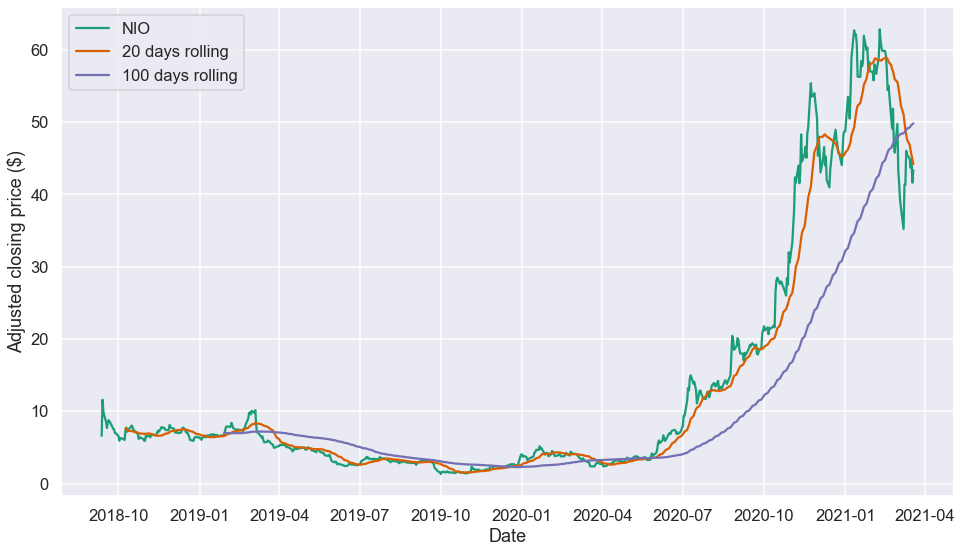

In [63]:
nio = close.loc[:, 'NIO']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_nio = nio.rolling(window=20).mean()
long_rolling_nio = nio.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(nio.index, nio, label='NIO')
ax.plot(short_rolling_nio.index, short_rolling_nio, label='20 days rolling')
ax.plot(long_rolling_nio.index, long_rolling_nio, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()


In [64]:
# Relative returns
returns = close.pct_change(1)
returns.tail()

,AAPL,ABNB,MSFT,NIO,^GSPC
2021-03-15,0.024457,0.015720,-0.003987,-0.012527,0.006492
2021-03-16,0.012743,-0.047526,0.012350,-0.027821,-0.001570
2021-03-17,-0.006451,0.006750,-0.002819,0.024725,0.002879
2021-03-18,-0.033905,-0.049215,-0.026662,-0.069928,-0.014761
2021-03-19,-0.004480,0.015357,-0.001604,0.041316,-0.000603


In [65]:
log_returns = np.log(close).diff()
log_returns.tail()

,AAPL,ABNB,MSFT,NIO,^GSPC
2021-03-15,0.024162,0.015598,-0.003995,-0.012607,0.006471
2021-03-16,0.012662,-0.048693,0.012275,-0.028215,-0.001571
2021-03-17,-0.006471,0.006727,-0.002823,0.024425,0.002875
2021-03-18,-0.034493,-0.050468,-0.027024,-0.072494,-0.014871
2021-03-19,-0.004490,0.015240,-0.001605,0.040486,-0.000603


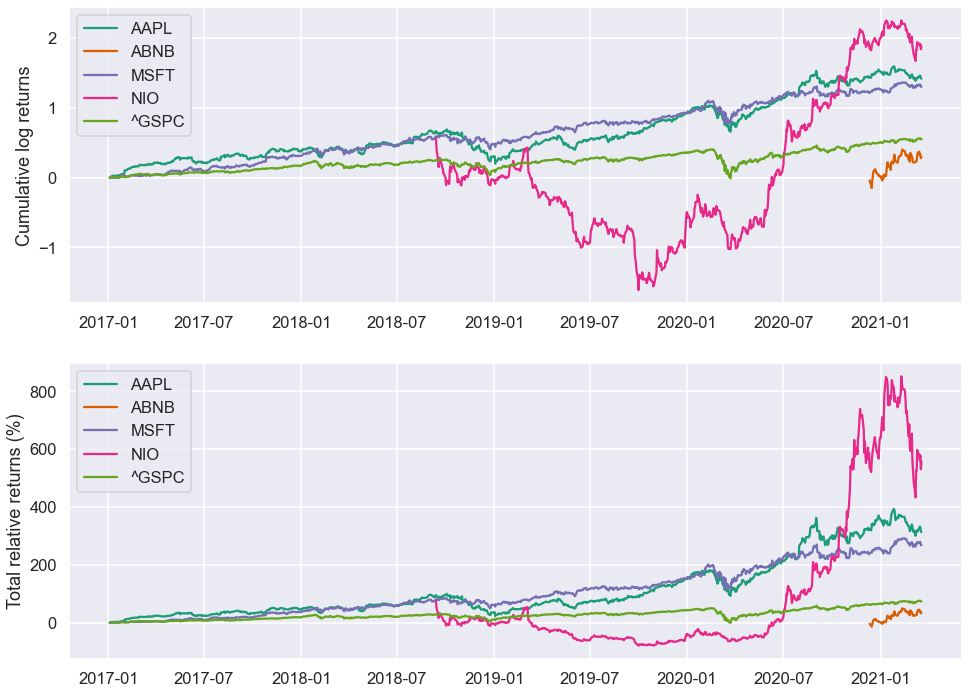

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/

In [67]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

,2021-03-19
AAPL,-0.004490
ABNB,0.015240
MSFT,-0.001605
NIO,0.040486
^GSPC,-0.000603


In [68]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 5, index=r_t.index, columns=r_t.columns)
weights_vector

,2021-03-19
AAPL,0.2
ABNB,0.2
MSFT,0.2
NIO,0.2
^GSPC,0.2


In [42]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2021-03-19
2021-03-19,0.012623


In [69]:
weights_matrix = pd.DataFrame(1 / 5, index=close.index, columns=close.columns)
weights_matrix.tail()

,AAPL,ABNB,MSFT,NIO,^GSPC
2021-03-15,0.2,0.2,0.2,0.2,0.2
2021-03-16,0.2,0.2,0.2,0.2,0.2
2021-03-17,0.2,0.2,0.2,0.2,0.2
2021-03-18,0.2,0.2,0.2,0.2,0.2
2021-03-19,0.2,0.2,0.2,0.2,0.2


In [70]:
log_returns.tail()

,AAPL,ABNB,MSFT,NIO,^GSPC
2021-03-15,0.024162,0.015598,-0.003995,-0.012607,0.006471
2021-03-16,0.012662,-0.048693,0.012275,-0.028215,-0.001571
2021-03-17,-0.006471,0.006727,-0.002823,0.024425,0.002875
2021-03-18,-0.034493,-0.050468,-0.027024,-0.072494,-0.014871
2021-03-19,-0.004490,0.015240,-0.001605,0.040486,-0.000603


In [77]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.tail()

,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,...,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19
2021-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027977,0.050999,-0.00121,0.045707,0.003959,0.005926,-0.010708,0.004947,-0.03987,0.009805
2021-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027977,0.050999,-0.00121,0.045707,0.003959,0.005926,-0.010708,0.004947,-0.03987,0.009805
2021-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027977,0.050999,-0.00121,0.045707,0.003959,0.005926,-0.010708,0.004947,-0.03987,0.009805
2021-03-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027977,0.050999,-0.00121,0.045707,0.003959,0.005926,-0.010708,0.004947,-0.03987,0.009805
2021-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027977,0.050999,-0.00121,0.045707,0.003959,0.005926,-0.010708,0.004947,-0.03987,0.009805


In [78]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2021-03-15    0.005926
2021-03-16   -0.010708
2021-03-17    0.004947
2021-03-18   -0.039870
2021-03-19    0.009805
Freq: B, dtype: float64

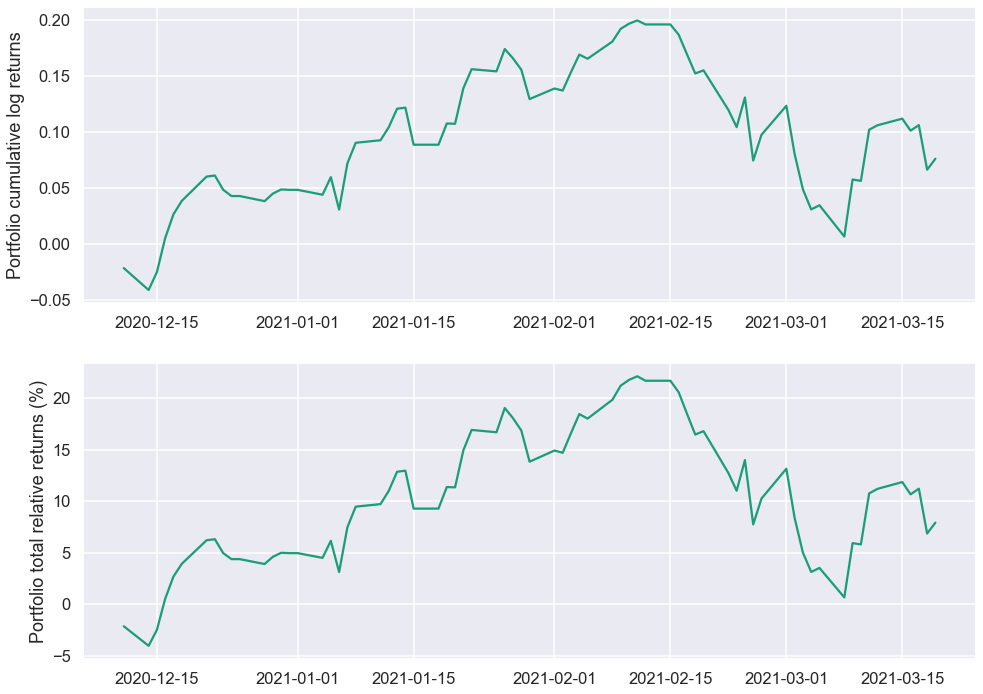

In [80]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax1.set_ylabel('Portfolio cumulative log returns')

ax2.plot(total_relative_returns.index, 100 * total_relative_returns)
ax2.set_ylabel('Portfolio total relative returns (%)')

plt.show()

In [82]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

Total portfolio return is:  7.91%
Average yearly return is:  1.89%


In [15]:
# TutoriaL: https://analyticsindiamag.com/hands-on-guide-to-using-yfinance-api-in-python/
import plotly.graph_objects as go
pfizer = yf.Ticker('PFE')
pfizer  =  pfizer.history(start=start_date,  end=end_date)
fig = go.Figure(data=[go.Candlestick(x=pfizer.index,
                                     open=pfizer['Open'],
                                     high=pfizer['High'],
                                     low=pfizer['Low'],
                                     close=pfizer['Close'])])
fig.show()

In [11]:
# Line Charts
import plotly.express as px
fig = px.line(pfizer, x=pfizer.index, y="Open", title='PFizer Stock Prices')
fig.show()

In [14]:
# OHLC Charts
fig = go.Figure(data=go.Ohlc(x=pfizer.index,
                    open=pfizer['Open'],
                    high=pfizer['High'],
                    low=pfizer['Low'],
                    close=pfizer['Close']))
fig.show()